In [2]:
from oddt import toolkit # import libraries and tools
from oddt import shape
from oddt import fingerprints

C:\Users\sarah\Anaconda3\lib\site-packages\oddt\__init__.py:50: UserWarning: No toolkit is present. Install OpenBabel or RDKit
  warnings.warn('No toolkit is present. Install OpenBabel or RDKit')


In [2]:
import numpy as np

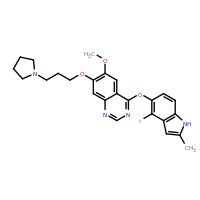

In [3]:
# Define mol1 using a string in smiles format, then display mol1
mol1 = toolkit.readstring(format='smiles',string='CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NC4=CC(=C(C=C43)OC)OCCCN5CCCC5')
mol1

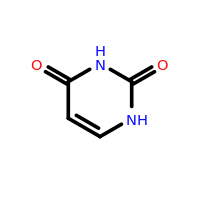

In [7]:
mol2 = toolkit.readstring(format='smiles', string='C1=C(C(=O)NC(=O)N1)')
mol2

Calculate MACCS Molecular Fingerprints: 166 bit structural key descriptors in which each bit is associated with a SMARTS pattern.)
* A structural key is a fixed-length bitstring in which each bit is associated with a specific molecular pattern. When a structural key is generated for a molecule, the bitstring encodes whether or not these specific molecular patterns are present or absent in the molecule. The performance of such keys depends on the choice of the fragments used for constructing the keys and the probability of their presence in the searched molecule databases.
* SMARTS is a language that allows specifying substructures by providing a number of primitive symbols describing atomic and bond properties. Atom and bond primitive specifications may be combined to form expressions by using logical operators.

**In a fingerprint there is a lot of different structures (SMARTS patterns) and we want to compare molecules depending on the presence of those structures in their fingerprint**

In [1]:
fp1 =mol1.calcfp(fptype='MACCS').raw 

NameError: name 'mol1' is not defined

In [13]:
len(mol1.calcfp(fptype='MACCS').raw)

256

In [14]:
mol2 = toolkit.readstring(format='smiles', string='C1=C(C(=O)NC(=O)N1)F')

In [15]:
fp2 = mol2.calcfp(fptype='MACCS').raw

In [17]:
np.sum (fp1 & fp2) # get the number of structures that are in mol1 AND mol2 
# (to see if the structure is in both of them)

29

In [20]:
np.sum(fp1  | fp2) # get the number of structures that are in mol1 OR mol2 
# (to see if the structure is in either of them)

67

In [21]:
def tanimoto_score(fp1, fp2):
    return np.sum(fp1 &  fp2) / np.sum(fp1 | fp2)

Put every steps tp get **tanimoto score** from **smiles strings** in one **function**.
This function only needs 2 arguments: 2 smiles string we want to get the tanimoto score from.
The tanimoto score describes similarity between 2 molecules

In [22]:
def fingerprintSimilarity(smile1, smile2):
    mol1 = toolkit.readstring(format='smiles',string=smile1)
    fp1 =mol1.calcfp(fptype='MACCS').raw
    mol2 = toolkit.readstring(format='smiles',string=smile2)
    fp2 =mol2.calcfp(fptype='MACCS').raw
    return tanimoto_score(fp1, fp2)

In [24]:
fingerprintSimilarity('C1=C(C(=O)NC(=O)N1)F','C1=C(C(=O)NC(=O)N1)F')

1.0

# Drug repurposing based drug chemical structure fingerprint/similarity

In [25]:
import csv
import pandas as pd

In [26]:
drug_disease = pd.read_csv('data/chiragjp-approved.txt',delimiter='\t')

In [ ]:
drug_disease.head() 

In [30]:
len(drug_disease.Drug.unique())

1519

We just got the number of different drugs in the file
and we take only the 500 first

In [92]:
approved_drugs = drug_disease.Drug.unique()[:500]

In [93]:
approved_drugs

array(['DB00001', 'DB00002', 'DB00003', 'DB00004', 'DB00005', 'DB00007',
       'DB00008', 'DB00009', 'DB00010', 'DB00013', 'DB00014', 'DB00015',
       'DB00016', 'DB00017', 'DB00019', 'DB00020', 'DB00022', 'DB00023',
       'DB00026', 'DB00027', 'DB00030', 'DB00031', 'DB00035', 'DB00036',
       'DB00038', 'DB00039', 'DB00040', 'DB00041', 'DB00043', 'DB00046',
       'DB00047', 'DB00048', 'DB00049', 'DB00051', 'DB00052', 'DB00053',
       'DB00056', 'DB00059', 'DB00060', 'DB00063', 'DB00065', 'DB00067',
       'DB00068', 'DB00072', 'DB00073', 'DB00074', 'DB00078', 'DB00080',
       'DB00082', 'DB00085', 'DB00087', 'DB00088', 'DB00090', 'DB00091',
       'DB00092', 'DB00095', 'DB00099', 'DB00100', 'DB00102', 'DB00103',
       'DB00104', 'DB00106', 'DB00107', 'DB00108', 'DB00109', 'DB00110',
       'DB00111', 'DB00112', 'DB00115', 'DB00121', 'DB00122', 'DB00126',
       'DB00128', 'DB00130', 'DB00131', 'DB00133', 'DB00136', 'DB00137',
       'DB00139', 'DB00140', 'DB00145', 'DB00146', 

In [94]:
# Open the input file and read the input
inputfile =open('data/drugbank-drug-smiles.tab')

In [95]:
#Create a dictionary of chemicals to be compared:
input_dict = dict()

We take the list of drugs to compare and only keep the one that are approved. 
Then we generate the MACCS fingerprint for those drugs and store it in the dictionary. Example:
```json
{
 DB0001: fwfvudgcvwhfcahcjtvsgyfbdrtnrjhbzkdbxvzvffxdes,
 DB0002: fp2,
 DB0003: fp3
}
```
The outcome of this loop is a dictionary input_dict with Drug IDs and the corresponding fingerprint

In [96]:
 for line in inputfile:
    newline = line.split()
    id = newline[0].strip('""')
    
    if id in approved_drugs:
        smiles = newline[1].strip('""')
        mol = toolkit.readstring(format='smiles',string=smiles)
        fp =mol.calcfp(fptype='MACCS').raw
        input_dict[id] = fp
inputfile.close()

In [97]:
len(input_dict) # number of drugs that 

436

In [98]:
# Open the results file (.csv file):
f = open("data/TC_results.csv", 'w')
writer = csv.writer(f)
writer.writerow(['chemical1', 'chemical2', 'TC'])

24

In [99]:
#Specify the TC cutoff. This option is useful if only the TCs of similar molecules above the established cutoff are needed. Otherwise, set T_CUTOFF=0 to provide all TC pair values:
T_CUTOFF = 0.45

**Double loop to compare all approved chemicals with each other to generate a CSV (`TC_results.csv`)**

In [100]:
#For each chemical in input list, calculate the TC between that chemical and all other chemicals in the input list using Open Babel:\

for chemical1 in input_dict :
    for chemical2 in input_dict :
        TC= tanimoto_score(input_dict[chemical1], input_dict[chemical2])
        if TC > T_CUTOFF and chemical1 != chemical2:
            writer.writerow([chemical1, chemical2, TC])
     

In [101]:
f.close()

In [102]:
sim_df = pd.read_csv('data/TC_results.csv')

In [104]:
len(sim_df)

30902

In [105]:
index=  drug_disease['Disease']=='C0272275'
drug_disease[index]

,Drug,Disease
0,DB00001,C0272275
632,DB00278,C0272275


In [107]:
sim_df[sim_df['chemical1']=='DB00278']

,chemical1,chemical2,TC
1056,DB00278,DB00104,0.526316
1057,DB00278,DB00261,0.451613
1058,DB00278,DB00263,0.544444
1059,DB00278,DB00274,0.509259
1060,DB00278,DB00275,0.505263
1061,DB00278,DB00619,0.511364
1062,DB00278,DB00623,0.477778
1063,DB00278,DB00626,0.541667
1064,DB00278,DB00634,0.482353
1065,DB00278,DB00642,0.483871


In [110]:
sim_df[sim_df['chemical1']=='DB00278'].sort_values(by='TC',ascending=False)

,chemical1,chemical2,TC
1132,DB00278,DB00203,0.700000
1070,DB00278,DB00222,0.687500
1086,DB00278,DB00391,0.684211
1107,DB00278,DB00014,0.633663
1072,DB00278,DB00232,0.630435
1157,DB00278,DB00559,0.626263
1066,DB00278,DB00644,0.621053
1123,DB00278,DB00666,0.621053
1120,DB00278,DB00524,0.619565
1067,DB00278,DB00650,0.615385


**Get all the other accepted drugs that are similar to the drug we want to repurpose (DB00278)**

In [154]:
sim_df.query('chemical1 =="DB00278" & TC > 0.6')

,chemical1,chemical2,TC
1066,DB00278,DB00644,0.621053
1067,DB00278,DB00650,0.615385
1070,DB00278,DB00222,0.687500
1072,DB00278,DB00232,0.630435
1086,DB00278,DB00391,0.684211
1107,DB00278,DB00014,0.633663
1108,DB00278,DB00035,0.612903
1120,DB00278,DB00524,0.619565
1123,DB00278,DB00666,0.621053
1132,DB00278,DB00203,0.700000


# Machine learning based drug repurposing

In [169]:
import sklearn

In [111]:
feature = pd.DataFrame.from_dict(input_dict, orient='index')

In [112]:
feature.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
DB00091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
trimmed_set =drug_disease[drug_disease.Drug.isin(feature.index)]

In [116]:
len(drug_disease)

6677

trimmed_set['Class']=1

In [118]:
trimmed_set.head()

,Drug,Disease,Class
22,DB00014,C1562029,1
23,DB00014,C0014175,1
44,DB00035,C0019069,1
45,DB00035,C0042974,1
46,DB00035,C0270327,1


In [119]:
from itertools import product
drugs=trimmed_set['Drug'].unique()
diseases=trimmed_set['Disease'].unique()
df = pd.DataFrame.from_records( list( i for i in product(drugs, diseases) ) , columns=['Drug' , 'Disease'] )

In [121]:
df.head()

,Drug,Disease
0,DB00014,C1562029
1,DB00014,C0014175
2,DB00014,C0019069
3,DB00014,C0042974
4,DB00014,C0270327


In [ ]:
result = pd.concat([df, trimmed_set], ignore_index=True)

In [124]:
result.head()

,Class,Disease,Drug
0,NaN,C1562029,DB00014
1,NaN,C0014175,DB00014
2,NaN,C0019069,DB00014
3,NaN,C0042974,DB00014
4,NaN,C0270327,DB00014


In [125]:
results =result.fillna(0)
results.head()

,Class,Disease,Drug
0,0.0,C1562029,DB00014
1,0.0,C0014175,DB00014
2,0.0,C0019069,DB00014
3,0.0,C0042974,DB00014
4,0.0,C0270327,DB00014


In [127]:
len(results[results.Class==0])

338336

In [128]:
negatives = results[results['Class'] == 0 ].sample(len(trimmed_set))

In [129]:
negatives.head()

,Class,Disease,Drug
16022,0.0,C0002994,DB00153
252531,0.0,C0010308,DB00553
141422,0.0,C0581377,DB00364
131280,0.0,C0271429,DB00351
237062,0.0,C0025202,DB00527


In [130]:
positives = trimmed_set

In [131]:
data = positives.append(negatives)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [133]:
len(data[data.Class==0])

2341

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
train, test =train_test_split(data, stratify=data['Class'], test_size  = 0.3)

In [141]:
len(train[train['Class']==1])

1638

In [142]:
feature.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
DB00091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
feature.index.name = 'Drug'
feature.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Drug,,,,,,,,,,,,,,,,,,,,,
DB00091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
train =train.merge(feature, on='Drug')
train.head()

,Class,Disease,Drug,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,1.0,C0030920,DB00462,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,C0010032,DB00462,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,C1260880,DB00462,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,C0520775,DB00462,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,C0027424,DB00462,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
test = test.merge(feature, on='Drug')

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
linear = LinearRegression()

In [149]:
columns = train.columns.difference(['Class','Drug','Disease'])

In [150]:
linear.fit(X=train[columns],y=train.Class)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [151]:
y= linear.predict(X=test[columns])

In [154]:
y > 0.5

array([ True, False, False, ..., False, False, False])

In [160]:
np.sum( np.array (test.Class) == np.array (y > 0.5))

923

In [161]:
len(y)

1405

In [162]:
923/1405

0.6569395017793594